# 1 - Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from xgboost import XGBRegressor
import matplotlib

# Importing the dataset
dataset = pd.read_excel('Pressure.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)
#print (y)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

# 2 - Training

## Calling the XGB Regressor

In [2]:
regressor = XGBRegressor(random_state = 67)

## Applying Grid Search to find the best model and the best parameters

In [6]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [600, 700, 800, 900, 1000, 1100, 1200],
               'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
               'gamma': [10, 5, 1, 0.1, 0.01, 0.001], 
               'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.5, 0.9] }]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.9877287305919304
Best Parameters: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1100}


## Training the XGB Regression model on the Training set

In [3]:
regressor = XGBRegressor(n_estimators = 1100,
                         max_depth = 3,
                         gamma = 1, 
                         learning_rate = 0.1,
                         random_state = 67)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1100,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=67,
             reg_alpha=0, reg_lambda=1, ...)

## Create a KFold object with 5 splits 

In [4]:
regressor.fit (X_train, y_train)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())


[0.99421724 0.99378536 0.9912528  0.97540676 0.98398149]
0.9877287305919304


# 3 - Prediction

## Load the model from disk

In [2]:
filename = 'finalized_model_XGB.sav'
regressor = pickle.load(open(filename, 'rb'))

## Predicting the Test set results

In [3]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 109.27  108.77]
 [7961.11 8013.45]
 [ 145.18  144.28]
 [ 377.8   274.19]
 [ 939.99 1007.45]
 [ 196.49  196.22]
 [ 132.69  131.96]
 [ 170.28  171.51]
 [1727.76 1731.23]
 [ 136.93  136.45]
 [ 298.15  309.78]
 [ 536.3   524.14]
 [ 130.63  130.67]
 [ 138.44  130.75]
 [ 376.81  354.25]
 [ 121.55  119.43]
 [ 117.53  117.43]
 [ 134.21  124.04]
 [ 111.67  113.14]
 [ 120.24  120.34]
 [3157.51 3132.78]
 [ 124.76  125.44]
 [ 125.01  124.65]
 [ 114.41  113.93]
 [ 296.69  300.84]
 [ 112.38  111.93]
 [ 284.64  263.48]
 [ 124.18  123.06]
 [ 152.91  151.21]
 [ 118.95  119.65]
 [ 210.86  207.89]
 [ 146.86  144.44]
 [ 120.98  118.21]
 [ 103.96  103.93]
 [ 174.71  173.54]
 [ 116.51  116.69]
 [ 258.94  219.04]
 [ 139.57  139.79]
 [ 123.14  124.99]
 [ 134.39  133.57]
 [ 117.46  116.81]
 [ 132.35  132.17]
 [ 546.43  524.32]
 [ 153.43  152.22]
 [ 261.67  241.93]
 [ 152.96  152.24]
 [ 158.94  156.44]
 [ 118.78  118.46]
 [ 111.    110.56]
 [2797.45 2751.58]
 [ 114.38  114.36]
 [ 210.88  205.96]
 [ 130.3   1

## Print Output

In [18]:
df = pd.DataFrame(file).T
df.to_excel(excel_writer = "E:/PhD/Machine Learning/Pressure_paper1/Output_XGB.xlsx")

PermissionError: [Errno 13] Permission denied: 'E:\\PhD\\Machine Learning\\Pressure_paper1/Output.xlsx'

# 4- Evaluating the Model Performance

### R2

In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9945513442741739


### Adj R2

In [8]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9943437764369996


### RMSE

In [9]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

70.64755500939542

### MAE

In [10]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

17.693809065385295

## Visualize

Text(0, 0.5, 'Predicted data')

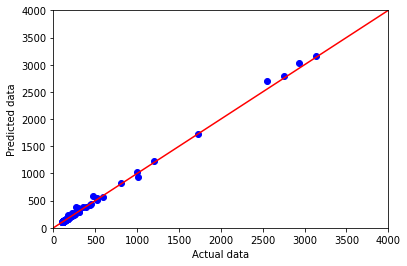

In [11]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,4000],[0,4000], color = "red")
plt.axis ([0,4000,0,4000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

## Error percentage visualization

Text(2500, 750, 'Adj.$R^2$ = 0.994')

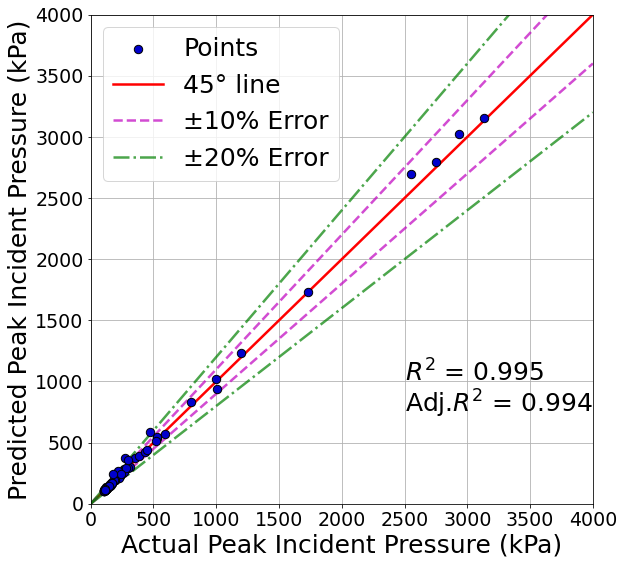

In [12]:
from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,4000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 4000)
plt.xlim(0, 4000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



ax.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
ax.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

## Error margins

In [13]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 93.64%
Within 20% margin 95.45%
Out of 20% margin 4.55%


## <500 kPa

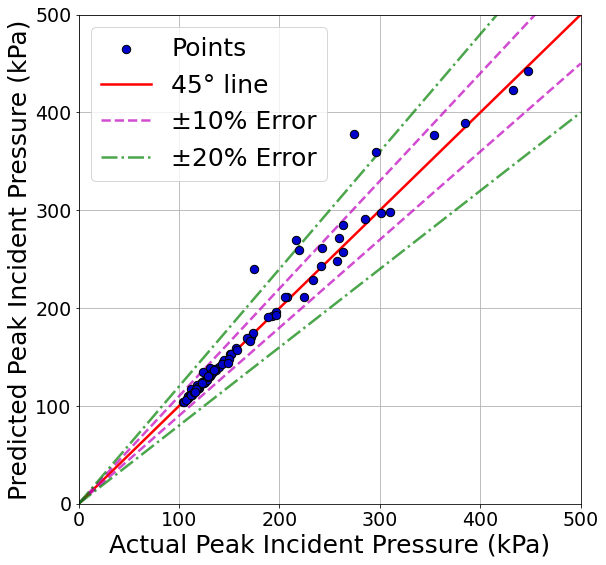

In [14]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, bx = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,500)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 500)
plt.xlim(0, 500)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (300, 100),fontsize = 25)  #Model is called here

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

# 5 - Contour plot visualization

### Clarifications

In [7]:
X_test.shape

(110, 4)

In [8]:
print (X_test)

[[0.0 1.0 3.5 17.5]
 [1.0 0.0 24.0 1.0]
 [1.0 0.0 22.0 11.0]
 [1.0 0.0 1.0 2.0]
 [0.0 1.0 15.5 2.5]
 [1.0 0.0 12.0 6.0]
 [1.0 0.0 24.0 14.0]
 [1.0 0.0 18.0 8.0]
 [1.0 0.0 16.0 2.0]
 [0.0 1.0 23.5 12.5]
 [0.0 1.0 7.5 3.5]
 [0.0 1.0 17.5 3.5]
 [0.0 1.0 21.5 13.5]
 [1.0 0.0 1.0 5.0]
 [0.0 1.0 9.5 3.5]
 [0.0 1.0 1.5 7.5]
 [1.0 0.0 18.0 19.0]
 [0.0 1.0 0.5 4.5]
 [1.0 0.0 4.0 14.0]
 [1.0 0.0 22.0 18.0]
 [0.0 1.0 19.5 1.5]
 [1.0 0.0 20.0 15.0]
 [0.0 1.0 17.5 14.5]
 [0.0 1.0 9.5 17.5]
 [1.0 0.0 20.0 5.0]
 [1.0 0.0 4.0 15.0]
 [0.0 1.0 11.5 4.5]
 [1.0 0.0 20.0 16.0]
 [0.0 1.0 13.5 8.5]
 [0.0 1.0 19.5 17.5]
 [0.0 1.0 19.5 6.5]
 [1.0 0.0 2.0 5.0]
 [0.0 1.0 9.5 14.5]
 [0.0 1.0 0.5 16.5]
 [0.0 1.0 24.5 8.5]
 [1.0 0.0 14.0 18.0]
 [0.0 1.0 3.5 3.5]
 [0.0 1.0 21.5 11.5]
 [0.0 1.0 11.5 12.5]
 [1.0 0.0 22.0 13.0]
 [1.0 0.0 12.0 17.0]
 [0.0 1.0 23.5 13.5]
 [1.0 0.0 24.0 4.0]
 [0.0 1.0 19.5 9.5]
 [0.0 1.0 9.5 4.5]
 [1.0 0.0 22.0 10.0]
 [1.0 0.0 24.0 10.0]
 [1.0 0.0 1.0 7.0]
 [0.0 1.0 1.5 11.5]
 [0.0 1.0 15

### Define the extents of the 2D space and the mesh size

In [4]:
start, stop, n_values = -8, 8, 400

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z = np.sqrt(X**2 + Y**2)
print (Z.shape)

d = Z.reshape(-1)
d = d.reshape(len (d), 1)
print (d)
print (d.shape)
print ("value", d[4,0])

(1, 400)
[[8.  ]
 [7.96]
 [7.92]
 [7.88]
 [7.84]
 [7.8 ]
 [7.76]
 [7.72]
 [7.68]
 [7.64]
 [7.6 ]
 [7.56]
 [7.52]
 [7.48]
 [7.44]
 [7.4 ]
 [7.36]
 [7.32]
 [7.28]
 [7.24]
 [7.2 ]
 [7.16]
 [7.12]
 [7.08]
 [7.04]
 [7.  ]
 [6.96]
 [6.92]
 [6.88]
 [6.84]
 [6.8 ]
 [6.76]
 [6.72]
 [6.68]
 [6.64]
 [6.6 ]
 [6.56]
 [6.52]
 [6.48]
 [6.44]
 [6.4 ]
 [6.36]
 [6.32]
 [6.28]
 [6.24]
 [6.2 ]
 [6.16]
 [6.12]
 [6.08]
 [6.04]
 [5.99]
 [5.95]
 [5.91]
 [5.87]
 [5.83]
 [5.79]
 [5.75]
 [5.71]
 [5.67]
 [5.63]
 [5.59]
 [5.55]
 [5.51]
 [5.47]
 [5.43]
 [5.39]
 [5.35]
 [5.31]
 [5.27]
 [5.23]
 [5.19]
 [5.15]
 [5.11]
 [5.07]
 [5.03]
 [4.99]
 [4.95]
 [4.91]
 [4.87]
 [4.83]
 [4.79]
 [4.75]
 [4.71]
 [4.67]
 [4.63]
 [4.59]
 [4.55]
 [4.51]
 [4.47]
 [4.43]
 [4.39]
 [4.35]
 [4.31]
 [4.27]
 [4.23]
 [4.19]
 [4.15]
 [4.11]
 [4.07]
 [4.03]
 [3.99]
 [3.95]
 [3.91]
 [3.87]
 [3.83]
 [3.79]
 [3.75]
 [3.71]
 [3.67]
 [3.63]
 [3.59]
 [3.55]
 [3.51]
 [3.47]
 [3.43]
 [3.39]
 [3.35]
 [3.31]
 [3.27]
 [3.23]
 [3.19]
 [3.15]
 [3.11]
 [3.07]

### Filter unique standoff distances

In [21]:
d_list = [tuple(row) for row in d]
#print (d_list)
print (type(d_list))
standoff_dis_list = list(set(d_list))
print (len(standoff_dis_list))

<class 'list'>
94402


### Defining charge mass and charge type

In [37]:
m = np.repeat(17.7, len(d)).reshape(len(d),1)

print (m.shape)
print (m)

c = np.repeat(1, len(d)).reshape(len(d),1)
print (c.shape)
print (c)

t = np.repeat(0, len(d)).reshape(len(d),1)
print (t.shape)
print (t)

(160000, 1)
[[17.7]
 [17.7]
 [17.7]
 ...
 [17.7]
 [17.7]
 [17.7]]
(160000, 1)
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
(160000, 1)
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


### Forming 2D array to predict peak incident pressure

In [38]:
arr = np.concatenate ((c, t, m, d), axis = 1)
print (arr)

[[ 1.          0.         17.7        11.3137085 ]
 [ 1.          0.         17.7        11.28538896]
 [ 1.          0.         17.7        11.25714103]
 ...
 [ 1.          0.         17.7        11.25714103]
 [ 1.          0.         17.7        11.28538896]
 [ 1.          0.         17.7        11.3137085 ]]


In [39]:
Z_pred = regressor.predict(arr)
print (Z_pred)

[137.22914 137.22914 137.22914 ... 137.22914 137.22914 137.22914]


### Point predictions

In [40]:
Z_pred = Z_pred.reshape(400, 400)
print (Z_pred)

[[137.22914 137.22914 137.22914 ... 137.22914 137.22914 137.22914]
 [137.22914 137.22914 140.48193 ... 140.48193 137.22914 137.22914]
 [137.22914 140.48193 140.48193 ... 140.48193 140.48193 137.22914]
 ...
 [137.22914 140.48193 140.48193 ... 140.48193 140.48193 137.22914]
 [137.22914 137.22914 140.48193 ... 140.48193 137.22914 137.22914]
 [137.22914 137.22914 137.22914 ... 137.22914 137.22914 137.22914]]


### Peak incident pressure contours

In [41]:
cdict = {'red': ((0.0, 0.0, 0.0),
                 (0.25, 0.2, 0.2),
                 (0.5, 0.0, 0.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 1.0, 1.0)),
        'green':((0.0, 0.0, 0.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 1.0, 1.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 0.0, 0.0)),
        'blue': ((0.0, 1.0, 1.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 0.0, 0.0),
                 (0.75, 0.0, 0.0),
                 (1.0, 0.0, 0.0))}

In [42]:
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

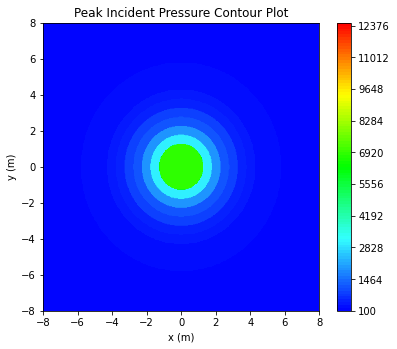

In [51]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
levels = np.linspace(100, 12500, 101)
cp = plt.contourf(X, Y, Z_pred, levels = levels, cmap = my_cmap)
plt.colorbar(cp)

ax.set_title('Peak Incident Pressure Contour Plot')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()

# 6 - Heatmap Bar

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import matplotlib

## Formulate dataset

In [2]:
# Read the dataset
dataset = pd.read_excel('Peak_Incident_Pressure_17.7kg.xlsx')
X = dataset['Standoff_distance']
sd = np.array(X)
print (sd.shape)
sd = sd.reshape(-1)
sd = sd.reshape(len (sd), 1)
print (sd.shape)

(176,)
(176, 1)


In [3]:
m = np.repeat(17.7, len(sd)).reshape(len(sd),1)

print (m.shape)
#print (m)

c = np.repeat(1, len(sd)).reshape(len(sd),1)
print (c.shape)
#print (c)

t = np.repeat(0, len(sd)).reshape(len(sd),1)
print (t.shape)
#print (t)

(176, 1)
(176, 1)
(176, 1)


In [4]:
arr = np.concatenate ((c, t, m, sd), axis = 1)
print (arr)

[[ 1.    0.   17.7   1.  ]
 [ 1.    0.   17.7   1.04]
 [ 1.    0.   17.7   1.08]
 [ 1.    0.   17.7   1.12]
 [ 1.    0.   17.7   1.16]
 [ 1.    0.   17.7   1.2 ]
 [ 1.    0.   17.7   1.24]
 [ 1.    0.   17.7   1.28]
 [ 1.    0.   17.7   1.32]
 [ 1.    0.   17.7   1.36]
 [ 1.    0.   17.7   1.4 ]
 [ 1.    0.   17.7   1.44]
 [ 1.    0.   17.7   1.48]
 [ 1.    0.   17.7   1.52]
 [ 1.    0.   17.7   1.56]
 [ 1.    0.   17.7   1.6 ]
 [ 1.    0.   17.7   1.64]
 [ 1.    0.   17.7   1.68]
 [ 1.    0.   17.7   1.72]
 [ 1.    0.   17.7   1.76]
 [ 1.    0.   17.7   1.8 ]
 [ 1.    0.   17.7   1.84]
 [ 1.    0.   17.7   1.88]
 [ 1.    0.   17.7   1.92]
 [ 1.    0.   17.7   1.96]
 [ 1.    0.   17.7   2.  ]
 [ 1.    0.   17.7   2.04]
 [ 1.    0.   17.7   2.08]
 [ 1.    0.   17.7   2.12]
 [ 1.    0.   17.7   2.16]
 [ 1.    0.   17.7   2.2 ]
 [ 1.    0.   17.7   2.24]
 [ 1.    0.   17.7   2.28]
 [ 1.    0.   17.7   2.32]
 [ 1.    0.   17.7   2.36]
 [ 1.    0.   17.7   2.4 ]
 [ 1.    0.   17.7   2.44]
 

## Load the model from disk

In [5]:
filename = 'finalized_model_XGB.sav'
regressor = pickle.load(open(filename, 'rb'))

## Make predictions

In [6]:
y3= regressor.predict(arr)
print (y3)
%store y3

[6854.272   6854.272   6854.272   6854.272   6854.272   6854.272
 6854.272   3024.1545  3024.1545  3024.1545  3024.1545  3024.1545
 3024.1545  3024.4426  3024.4426  3024.4426  3024.4426  3024.4426
 3024.4426  1882.0168  1882.0168  1882.0168  1882.0168  1882.0168
 1882.0168  1882.0168  1882.0168  1882.0168  1882.0168  1882.0168
 1882.0168  1882.0168  1102.7834  1102.7834  1102.7834  1102.7834
 1102.7834  1102.7834  1102.7834  1102.7834  1102.7834  1102.7834
 1102.7834  1102.7834   845.3413   845.3413   845.3413   845.3413
  845.3413   845.3413   845.3413   845.3413   845.3413   845.3413
  845.3413   845.3413   845.3413   535.97595  535.97595  535.97595
  535.97595  535.97595  535.97595  536.80536  536.80536  536.80536
  536.80536  536.80536  536.80536  417.58545  417.58545  417.58545
  417.58545  417.58545  417.58545  417.58545  417.58545  417.58545
  417.58545  417.58545  417.58545  417.58545  324.4561   324.4561
  324.4561   324.4561   324.4561   324.4561   324.4561   324.4561
  324.4

## Visualise

In [7]:
cdict = {'red': ((0.0, 0.0, 0.0),
                 (0.25, 0.2, 0.2),
                 (0.5, 0.0, 0.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 1.0, 1.0)),
        'green':((0.0, 0.0, 0.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 1.0, 1.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 0.0, 0.0)),
        'blue': ((0.0, 1.0, 1.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 0.0, 0.0),
                 (0.75, 0.0, 0.0),
                 (1.0, 0.0, 0.0))}

In [8]:
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

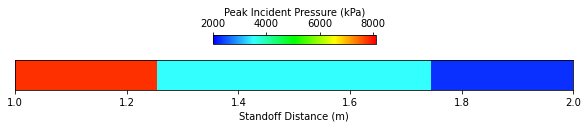

In [9]:
# Create the heatmap strip
plt.figure(figsize=(10, 1))
heatmap = plt.imshow(y3.reshape(1, -1), cmap=my_cmap, aspect='auto',
                     extent=[X.min(), X.max(), y3.min(), y3.max()], vmin = 2000, vmax = 8100)
plt.yticks([])

plt.colorbar(heatmap, label='Peak Incident Pressure (kPa)', location = 'top', pad=0.3)

plt.xlabel('Standoff Distance (m)')
plt.show()

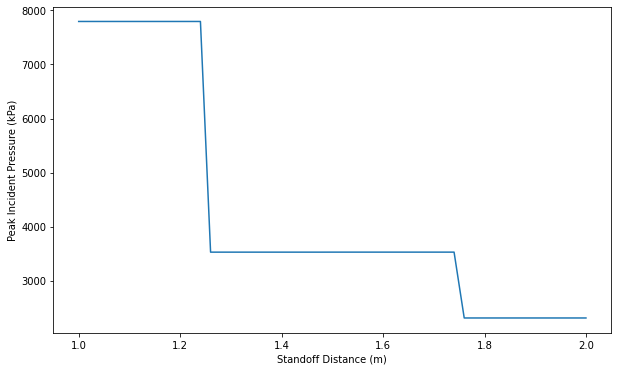

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(X, y3)
plt.xlabel('Standoff Distance (m)')
plt.ylabel('Peak Incident Pressure (kPa)')
plt.show()